In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


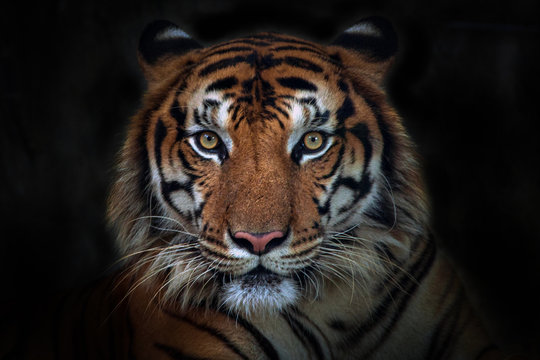

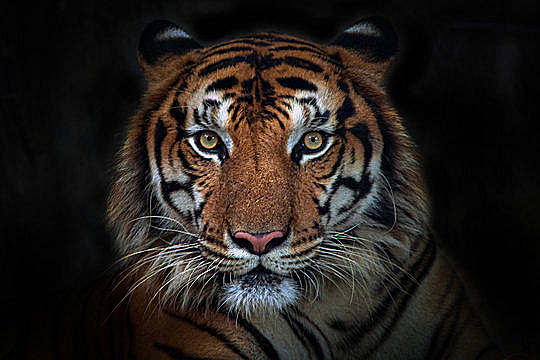

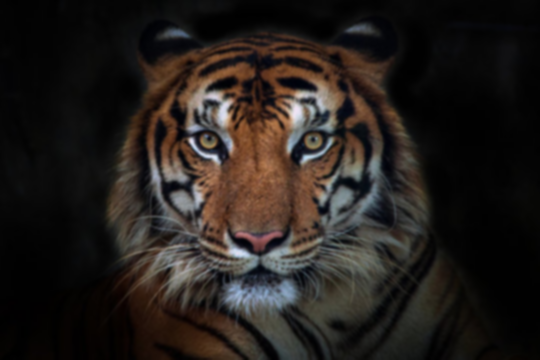

In [14]:

def sharpen_image(image, kernel_size=(7, 7), gamma=2):
  image = image.astype(np.float32) / 255.0
  blr_img = cv2.GaussianBlur(image, (5, 5), 0)

  # TODO: Calculate the difference between the original and blurred image
  dif_img = image - blr_img
  # TODO: Apply the gamma factor
  dif_img = dif_img * 2
  # TODO:
  # Add the sharpened detail back to the original image
  # Convert sharpened_detail to the same data type as the original image
  # return the sharp image and the blur one
  sharp_img = cv2.addWeighted(image, 1, dif_img, 1, 0)
  sharp_img_final = np.clip(sharp_img, 0, 1)
  sharp_img_final = (sharp_img_final * 255).astype(np.uint8)
  blr_img_final = (blr_img * 255).astype(np.uint8)
  return sharp_img_final, blr_img_final


image = cv2.imread('tiger.jpg')
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print("Error: Could not load image.")

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


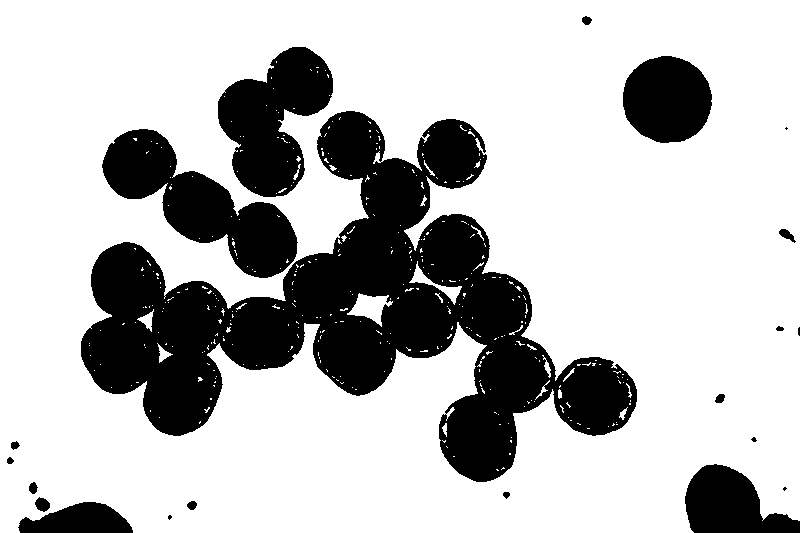

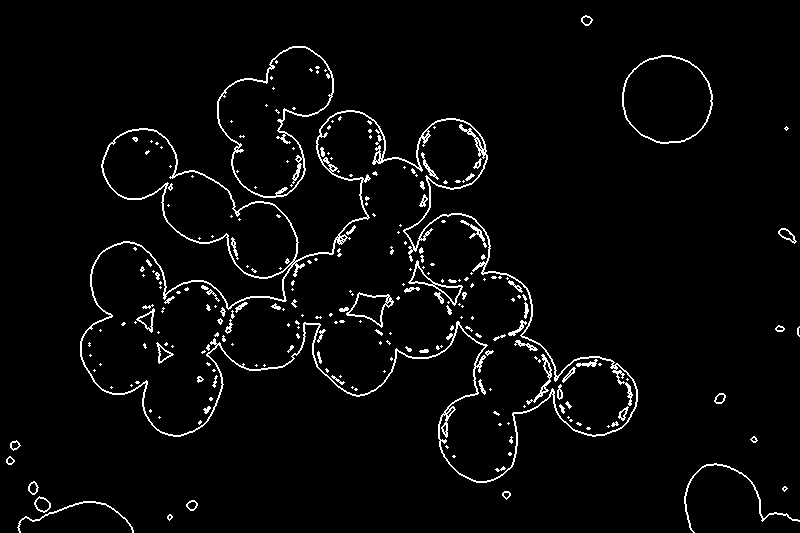

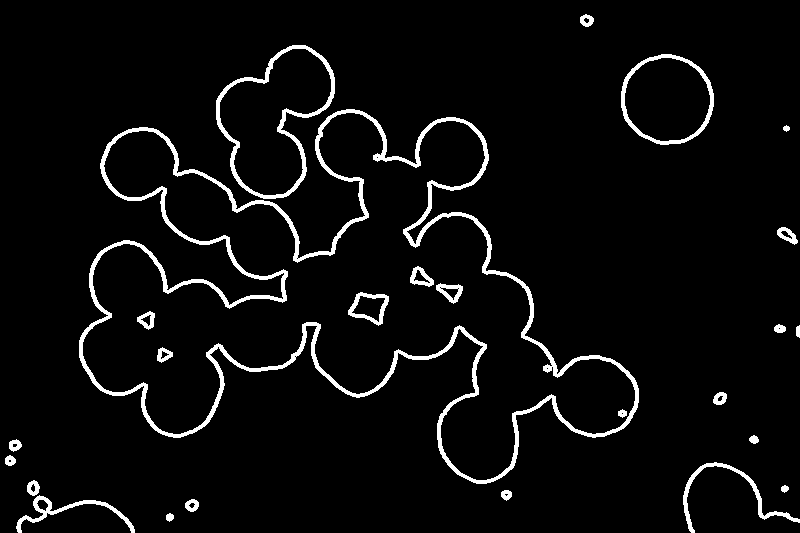

In [14]:
# Read the image
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# TODO: Morphological edge detection (dilate and then erode and then ...)
dilated = cv2.dilate(binary, kernel2, iterations=1)
closed = cv2.erode(dilated, kernel2, iterations=1)
# TODO: clean edges with morphological closing
lapl = cv2.Laplacian(closed, cv2.CV_64F)
lapl = cv2.convertScaleAbs(lapl)
#Noise Removal(Extra)
binary_i = cv2.bitwise_not(binary)
c_mask = cv2.morphologyEx(binary_i, cv2.MORPH_OPEN, kernel2, iterations=1)
c_mask = cv2.morphologyEx(c_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
edges = cv2.morphologyEx(c_mask, cv2.MORPH_GRADIENT, kernel)

# TODO: Show results
cv2_imshow(closed)
cv2_imshow(lapl)
cv2_imshow(edges)

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

number of components: 26


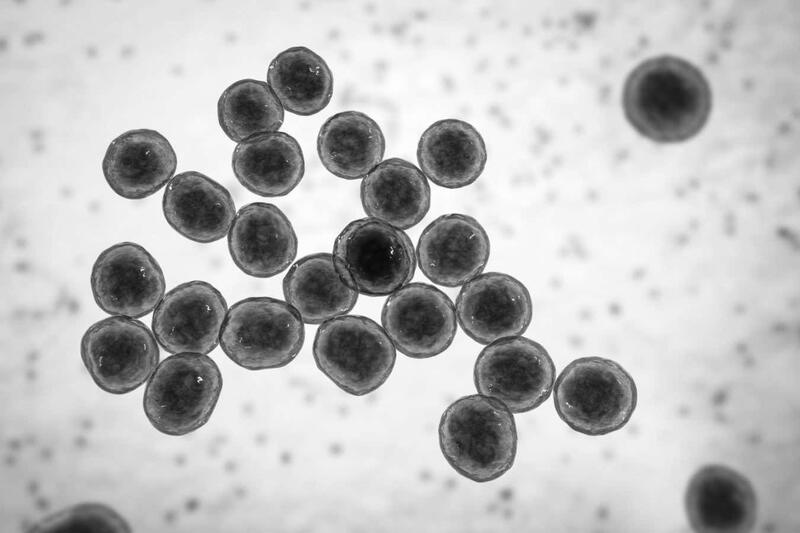

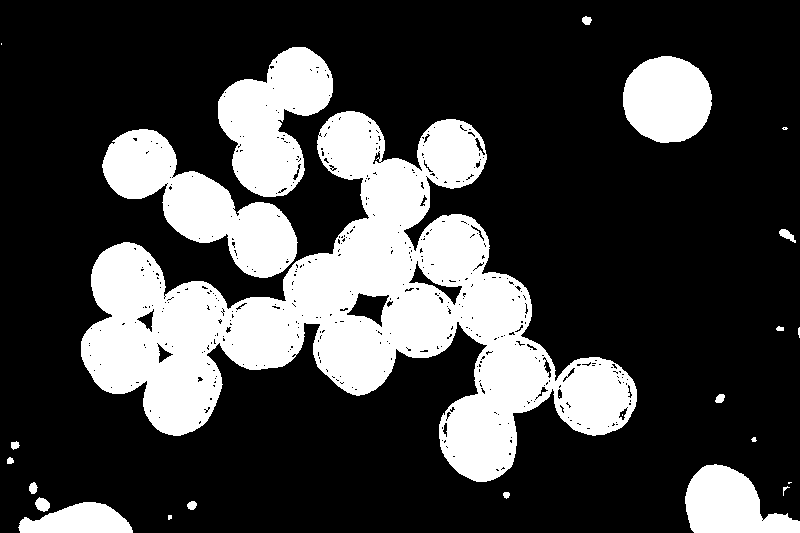

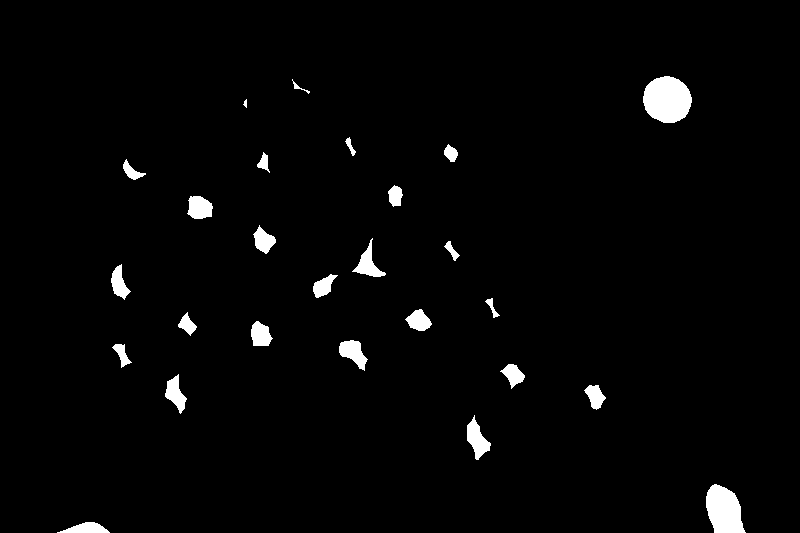

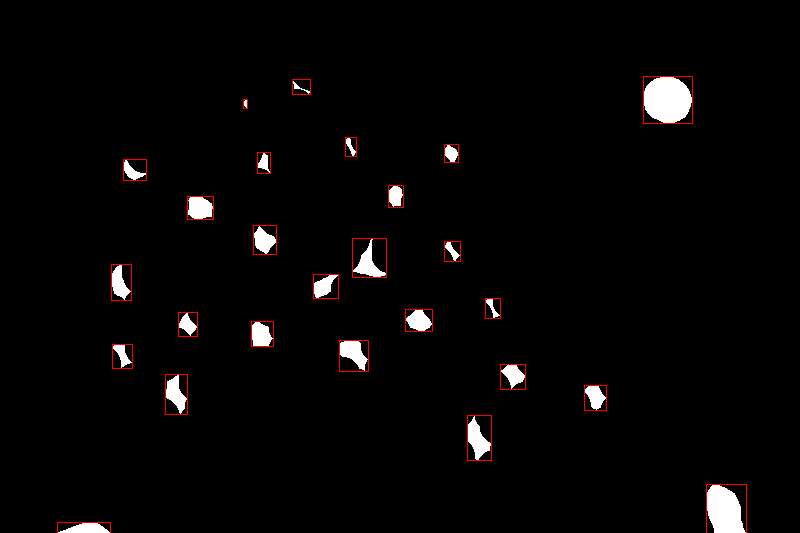

In [13]:
# Load image (grayscale)
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)
# TODO: Erosion to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
er_img = cv2.erode(binary, kernel, iterations=1)
# TODO: Connected component analysis
num, labels, st, cntr = cv2.connectedComponentsWithStats(er_img, connectivity=8)
# TODO: print the number of components
print(f"number of components: {num - 1}")
# TODO: Draw results (Boxes)
boxed_img = cv2.cvtColor(er_img, cv2.COLOR_GRAY2BGR)
for i in range(1, num):
    x = st[i, cv2.CC_STAT_LEFT]
    y = st[i, cv2.CC_STAT_TOP]
    w = st[i, cv2.CC_STAT_WIDTH]
    h = st[i, cv2.CC_STAT_HEIGHT]
    cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
# TODO: Display
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
di_img = cv2.dilate(er_img, kernel2, iterations=1)
cv2_imshow(img)
cv2_imshow(binary)
cv2_imshow(er_img)
cv2_imshow(boxed_img)


# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge